# MNIST ASSIGNMENT:

Change the code 8 or your own 4th Code from Assignment 4 to include:


- image normalization

- L2 regularization

- ReLU after BN


Run your new code for 40 epochs and save the model with highest validation accuracy


Find out 25 misclassified images from the validation dataset and create an image gallery
Submit


## Getting things ready!

We set seed so not to lose our progress due to randomness.

We later on the following libraries:

1. Keras ([Keras Documentation](https://keras.io/)) :- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
We import keras layers, model type Sequential (since we will be building a sequential model), and utils for plotting model and for converting single class to categorical 10 classes.

2. We also import Train_test_split, Model checkpoints to save the model and ImageDataGenerator just to create a batch flow into the network. **(We are not using any augumentation techniques & other tuning parameters)**.

The whole model is in itself is most basic & default.

In [0]:
import numpy as np
np.random.seed(25)

In [2]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from keras.models import (Sequential,
                          load_model)

from keras.layers import (Dropout,
                          Activation,
                          Flatten,Conv2D,
                          MaxPooling2D,
                          BatchNormalization)

from keras import regularizers

from keras.utils import (np_utils,
                         plot_model)

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import datetime

from keras.datasets import mnist

## Load pre-shuffled MNIST data into Train set and Test set

After loading the Train and Test sets, we initially plot any one image from the Train set and see how the images really look like. 

We then reshape our data into 28x28x1, which would be input to our network. Here 28x28 is the image Height x Width and 1 is the number of channels. We also standardise our pixel (range: 0-255) values so as to obtain normally distributed pixel values between range 0-1, and also due to computational reasons.

We explore total number of digits on each class and then, convert our target variable into categorical 10 classes output, where each bit is set to 1 corresponding to the actual digit value. 

- Example: if the digit value is 6, then the 6th column is set to 1 and the rest 9 columns are set to 0.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


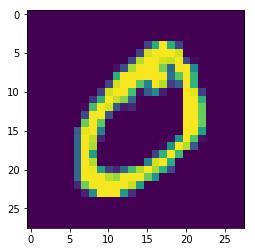

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Exploratary Data Analysis : 

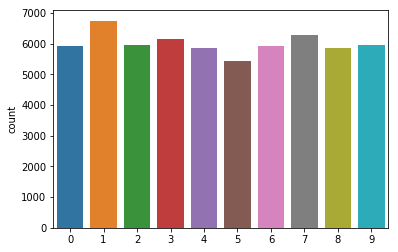

In [9]:
sns.countplot(y_train)

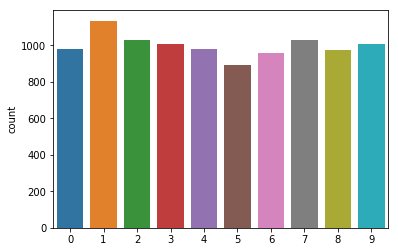

In [10]:
sns.countplot(y_test)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)


## The architecture is:

INPUT>>CN>>BN>>CN>>BN>>MP>>DP>>CN>>BN>>CN>>BN>>CN>>BN>>MP>>DP>>CN>>BN>>CN>>FLATTERN>>OUTPUT

In [13]:
model = Sequential()

model.add(Conv2D(16, kernel_size = 3,name="Conv2D_1", input_shape = (28, 28, 1),kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_1"))
model.add(Activation('relu'))
model.add(Conv2D(30, kernel_size = 3,name="Conv2D_2",kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_2"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_1"))
model.add(Dropout(0.2))

model.add(Conv2D(12, kernel_size = 3,name="Conv2D_3",kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_3"))
model.add(Activation('relu'))
model.add(Conv2D(12, kernel_size = 3,name="Conv2D_4",kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_4"))
model.add(Activation('relu'))
model.add(Conv2D(29, kernel_size = 3,name="Conv2D_5",kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_5"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_2"))
model.add(Dropout(0.2))

model.add(Conv2D(18,kernel_size=(1,1),name="Conv2D_6",kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization(name="BatchNormalization_6"))
model.add(Activation('relu'))
model.add(Conv2D(10, kernel_size = 3,name="Conv2D_7"))
model.add(Flatten())
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
BatchNormalization_1 (BatchN (None, 26, 26, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 30)        4350      
_________________________________________________________________
BatchNormalization_2 (BatchN (None, 24, 24, 30)        120       
_________________________________________________________________
activation_2 (Activat

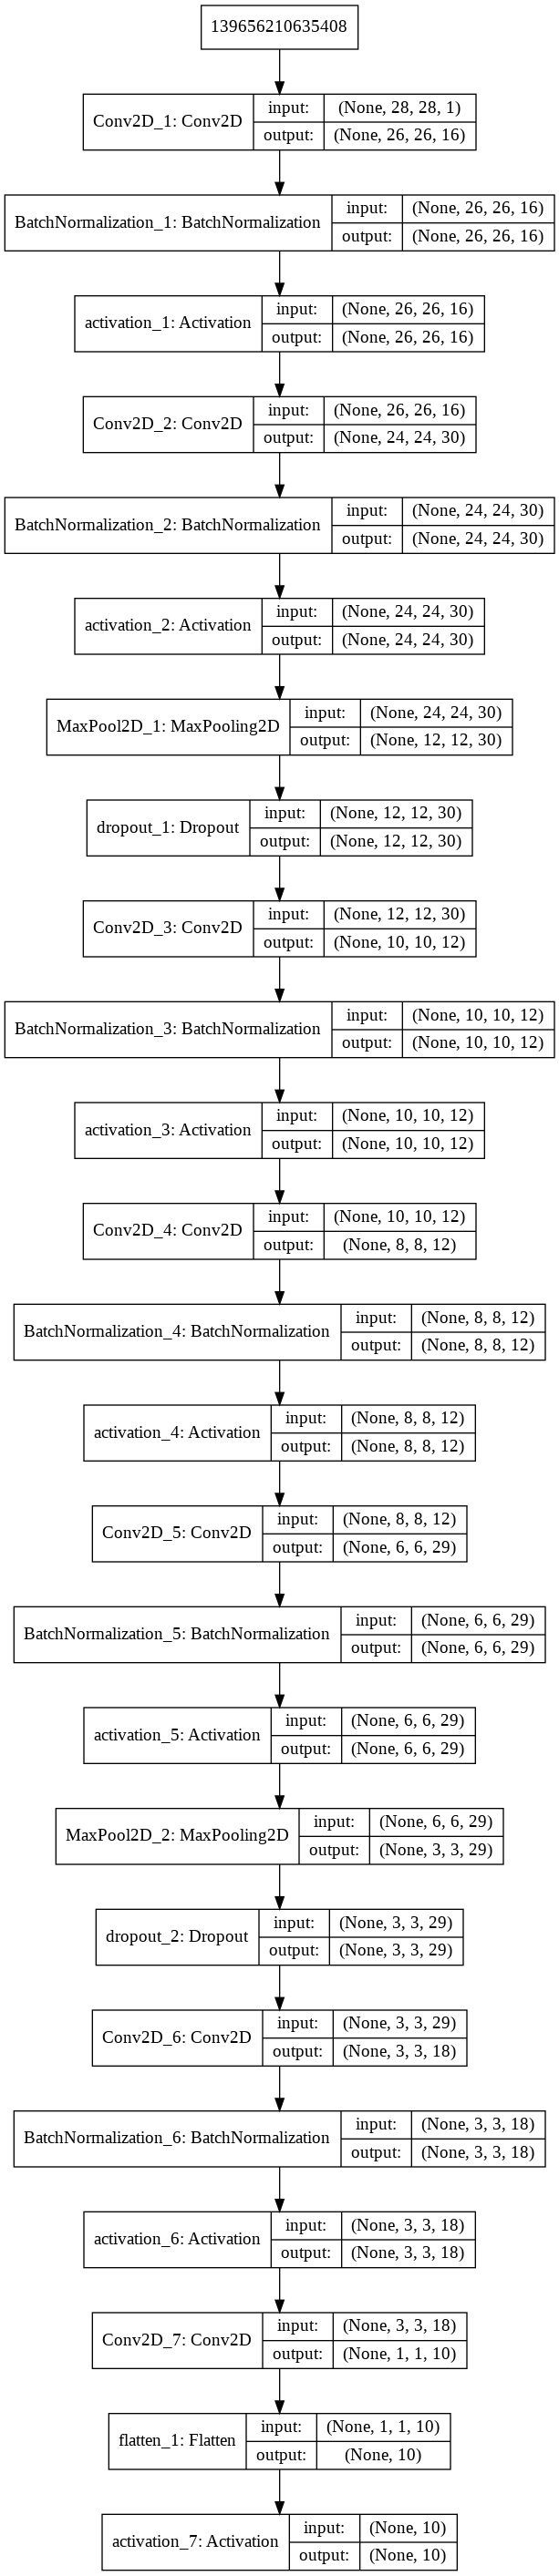

In [14]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [15]:
datagen = ImageDataGenerator(featurewise_center=True,
                            featurewise_std_normalization=True)

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=128),
                            epochs = 40, 
                            steps_per_epoch=5000,
                            validation_steps=6000,
                            validation_data = datagen.flow(X_test,Y_test,batch_size=128),
                            verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
5000/5000 [==============================] - 86s 17ms/step - loss: 0.1255 - acc: 0.9754 - val_loss: 0.0565 - val_acc: 0.9899
Epoch 2/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0511 - acc: 0.9903 - val_loss: 0.0489 - val_acc: 0.9909
Epoch 3/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0468 - acc: 0.9911 - val_loss: 0.0478 - val_acc: 0.9915
Epoch 4/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0443 - acc: 0.9918 - val_loss: 0.0434 - val_acc: 0.9928
Epoch 5/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0434 - acc: 0.9919 - val_loss: 0.0456 - val_acc: 0.9919
Epoch 6/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0422 - acc: 0.9924 - val_loss: 0.0427 - val_acc: 0.9922
Epoch 7/40
5000/5000 [==============================] - 81s 16ms/step - loss: 0.0421 - acc: 0.9924 - val_loss: 0.0437 - val_acc: 0.9917


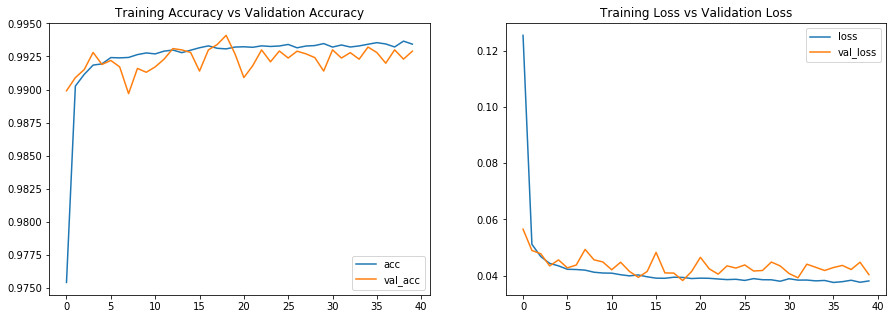

In [16]:
def plot_(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f, [ax1, ax2] = plt.subplots(1,2, figsize=(15, 5))
    ax1.plot(range(len(acc)), acc, label="acc")
    ax1.plot(range(len(acc)), val_acc, label="val_acc")
    ax1.set_title("Training Accuracy vs Validation Accuracy")
    ax1.legend()

    ax2.plot(range(len(loss)), loss, label="loss")
    ax2.plot(range(len(loss)), val_loss, label="val_loss")
    ax2.set_title("Training Loss vs Validation Loss")
    ax2.legend()
    
plot_(model.history)

In [17]:
print(round(max(model.history.history['val_acc']),4))

0.9941


In [0]:
predicted_classes = model.predict_classes(X_test)

In [0]:
true_labels = y_test

In [20]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
true_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
count=0
image_index=list()
for i in range(len(true_labels)):
  if predicted_classes[i] != true_labels[i]:
    image_index.append(i)
    count+=1

In [23]:
print(count)
print(image_index)

71
[321, 582, 740, 786, 882, 947, 965, 1014, 1039, 1182, 1232, 1242, 1260, 1299, 1393, 1522, 1527, 1530, 1901, 2035, 2070, 2129, 2130, 2135, 2182, 2225, 2266, 2293, 2454, 2597, 2654, 2995, 3060, 3073, 3225, 3422, 3520, 3558, 3727, 3762, 3821, 4007, 4078, 4176, 4360, 4443, 4497, 4504, 4571, 4639, 4699, 4740, 4823, 5937, 5955, 5997, 6571, 6576, 6597, 6625, 7235, 7472, 8316, 8408, 8527, 9642, 9664, 9729, 9792, 9839, 9922]


We see that total misclassified images are 106

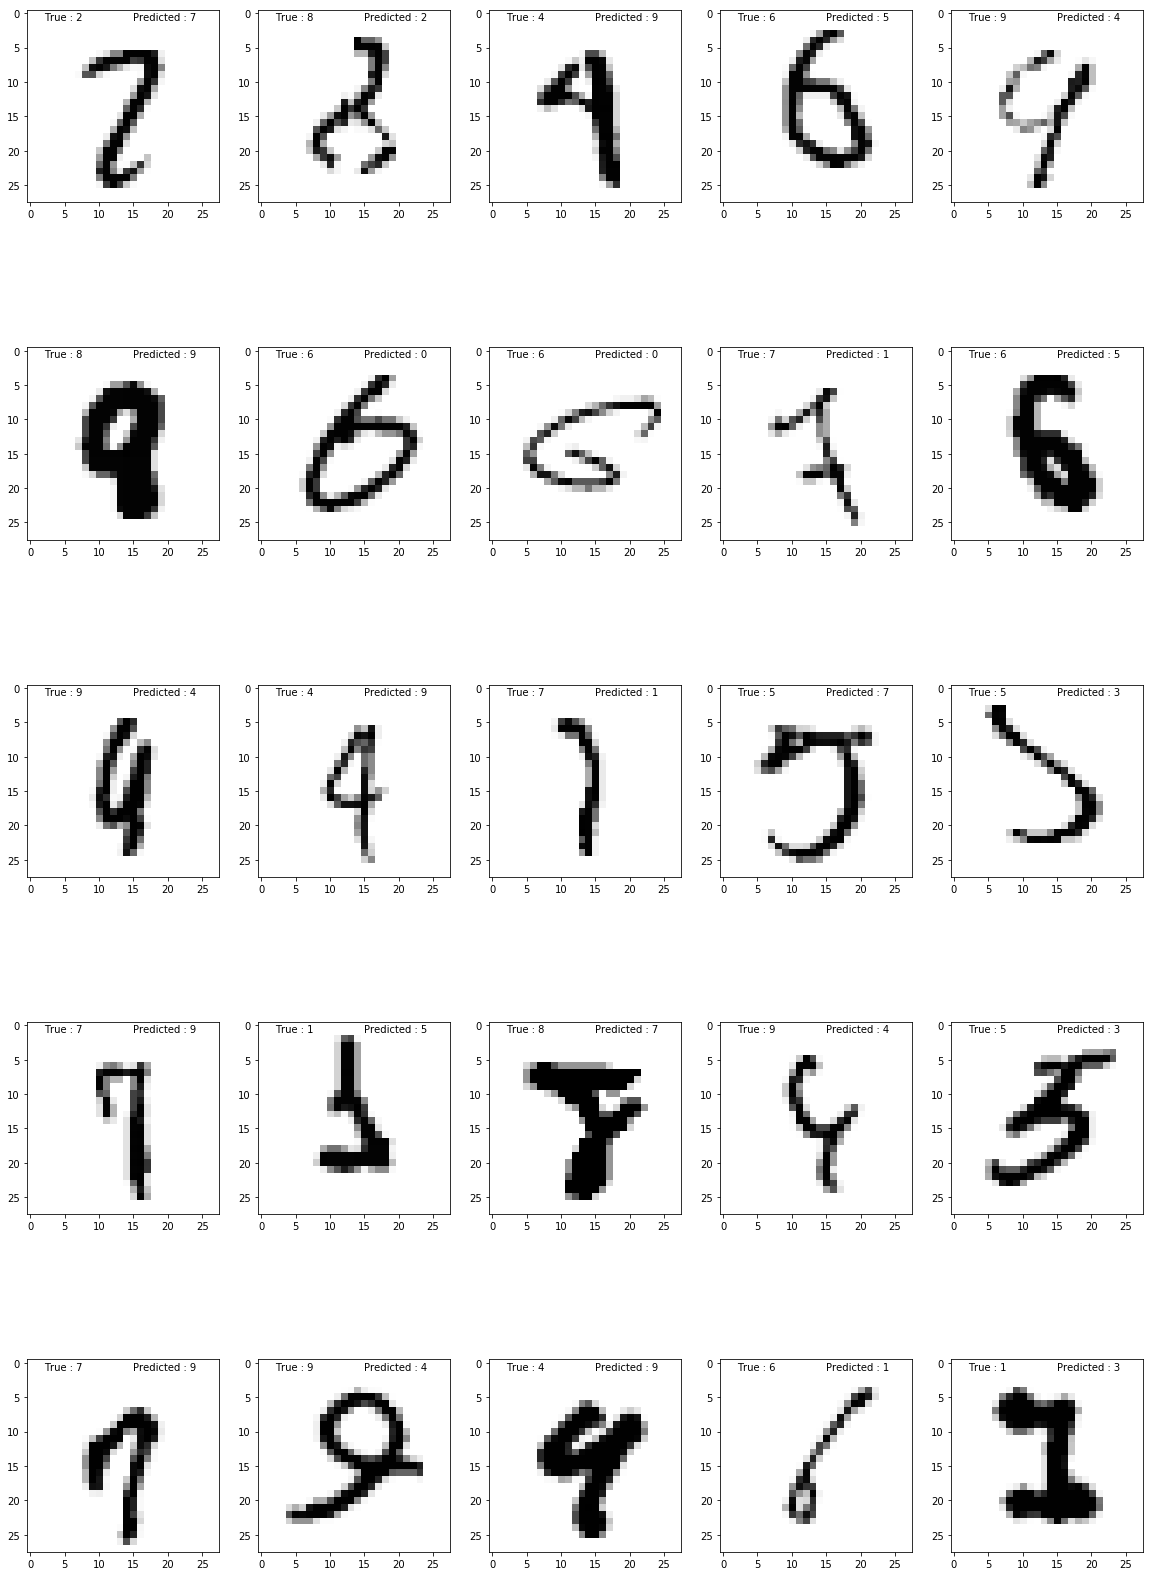

In [24]:
flag=0
n_row = 5
n_col = 5
j=0
# Plot the first 8 eignenvalues
plt.figure(figsize=(20,30))

for i in range(len(true_labels)):
  if predicted_classes[i] != true_labels[i]:
    plt.subplot(n_row, n_col, j + 1)
    img = X_test[i].reshape([28,28])
    plt.imshow(img,cmap='Greys')
    plt.text(x=2,y=1,s='True : '+str(true_labels[i]))
    plt.text(x=15,y=1,s='Predicted : '+str(predicted_classes[i]))
    flag+=1
    j+=1
  if flag==25:
    break
  
plt.show()